In [3]:
from google.colab import files
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
uploaded = files.upload()

Saving t10k-images-idx3-ubyte.gz to t10k-images-idx3-ubyte.gz
Saving t10k-labels-idx1-ubyte.gz to t10k-labels-idx1-ubyte.gz
Saving train-images-idx3-ubyte.gz to train-images-idx3-ubyte.gz
Saving train-labels-idx1-ubyte.gz to train-labels-idx1-ubyte.gz


In [4]:
uploaded = files.upload()

Saving util_mnist_reader.py to util_mnist_reader.py


In [0]:
import util_mnist_reader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [0]:
# Read Fashion MNIST dataset
X_train, y_train = util_mnist_reader.load_mnist('', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('', kind='t10k')


In [28]:
#preprocessing of the images

#normalise the image
X_train=X_train/255
X_test=X_test/255
y_train=y_train.reshape(-1,1)

#onehot encode the output
encoder= OneHotEncoder()
y_train=encoder.fit_transform(y_train)
y_train=y_train.toarray()
y_test=y_test.reshape(-1,1)
y_test=encoder.transform(y_test)
y_test=y_test.toarray()


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
#the softmax function
def softMax(x):
    expX=np.exp(x)
    return expX/expX.sum(axis=1,keepdims=True)
#learning rate
lr=0.4
#array to store the loss function
error_cost = []
error_cost_val=[]
#split into testing and validation date
X_val,X_test,y_val,y_test=train_test_split(X_test, y_test, test_size=0.50)

In [0]:
#method for training
def train_model(X_train,y_train,n):
    w1=np.random.rand(784,50)*0.001
    b1=np.random.rand(1,50)
    w2=np.random.rand(50,10)*0.001
    b2=np.random.rand(1,10)
    for epoch in range(3000):

        #forward pass  
        z1=np.dot(X_train,w1)+b1
        a1=1/(1+np.exp(-z1))
        z2=np.dot(a1,w2)+b2
        a2=softMax(z2)

        #gradient claculation
        dz2=a2-y_train
        dw2=np.dot(a1.T,dz2)/n
        db2=np.sum(dz2,axis=0,keepdims=True)/n
        tmp=np.dot(dz2,w2.T)
        dz1=tmp*a1*(1-a1)
        dw1=np.dot(X_train.T,dz1)/n
        db1=np.sum(dz1,axis=0,keepdims=True)/n

        #calculate and store loss for training and val data
        #print(y_train.shape)
        loss = np.sum(-y_train * np.log(a2))/n
        error_cost.append(loss)
        z1=np.dot(X_val,w1)+b1
        a1=1/(1+np.exp(-z1))
        z2=np.dot(a1,w2)+b2
        a2=softMax(z2)
        loss_val=np.sum(-y_val * np.log(a2))/n
        error_cost_val.append(loss_val)

        #paramters update
        w1=w1-lr*dw1
        w2=w2-lr*dw2
        b1=b1-lr*db1
        b2=b2-lr*db2

        
        if epoch % 500 == 0:
            print('Loss function value: ', loss_val)
            
    return w1,w2,b1,b2

In [44]:
#train the model
w1,w2,b1,b2=train_model(X_train,y_train,60000)

def pred(w1,w2,b1,b2,X_test):
    z1=np.dot(X_test,w1)+b1
    a1=1/(1+np.exp(-z1))
    z2=np.dot(a1,w2)+b2
    a2=softMax(z2)
    return a2

#predict the for test data
y_pred=pred(w1,w2,b1,b2,X_test)
y_one_hot=np.zeros_like(y_pred)
y_one_hot[np.arange(len(y_pred)),y_pred.argmax(1)]=1

Loss function value:  0.1939032563875888
Loss function value:  0.049463576863550185
Loss function value:  0.04002610468035111
Loss function value:  0.03698776172608636
Loss function value:  0.03567403946887402
Loss function value:  0.03444472615072535


3008


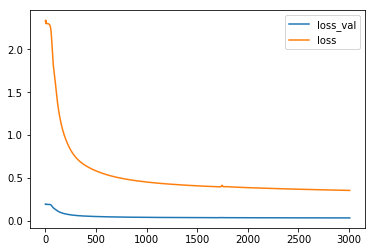

In [45]:
#graph of loss vs epoch
print(len(error_cost_val))
plt.plot(error_cost_val)
plt.plot(error_cost)
plt.legend(["loss_val","loss"])
plt.show()

In [12]:
#print accuracy
acc=accuracy_score(y_test, y_one_hot)
print(acc)

0.4236


In [18]:
from sklearn.metrics import confusion_matrix
y_test1=y_test.argmax(1)
y_one1=y_one_hot.argmax(1)
ac=confusion_matrix(y_test1, y_one1)
print(ac)

[[418   1   9  20   0   2  53   0   2   0]
 [  2 501   1  13   1   0   1   0   1   0]
 [  5   2 410   4  50   0  45   0   4   0]
 [ 12   8   5 448  11   0  13   0   4   0]
 [  1   2  56  23 340   0  48   0   4   0]
 [  0   0   0   0   0 466   0  25   1  11]
 [ 64   0  52  15  30   0 314   0  12   0]
 [  0   0   0   0   0  16   0 454   0  20]
 [  0   0   5   4   1   1   6   3 491   0]
 [  0   0   0   0   0  10   0  24   0 455]]


In [47]:
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D
from keras import optimizers

Using TensorFlow backend.


###Keras multi layer NN

In [0]:
#declare the NN with 2 hidden layers
classifier= Sequential()
classifier.add(Dense(50,activation='sigmoid',input_dim=784))
classifier.add(Dense(40,activation='sigmoid'))
#output layer
classifier.add(Dense(10,activation='softmax'))
#definelr
sgd = optimizers.SGD(lr=0.4)
classifier.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [233]:
#train the classifier
training_stats = classifier.fit(X_train,y_train, batch_size=32, epochs=50,validation_data=(X_val, y_val))

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 119us/step - loss: 2.2753 - acc: 0.2657 - val_loss: 2.2238 - val_acc: 0.3800
Epoch 2/50
60000/60000 [==============================] - 3s 46us/step - loss: 2.1732 - acc: 0.4231 - val_loss: 2.1160 - val_acc: 0.3978
Epoch 3/50
60000/60000 [==============================] - 3s 46us/step - loss: 2.0393 - acc: 0.4681 - val_loss: 1.9578 - val_acc: 0.4670
Epoch 4/50
60000/60000 [==============================] - 3s 45us/step - loss: 1.8707 - acc: 0.5297 - val_loss: 1.7890 - val_acc: 0.5638
Epoch 5/50
60000/60000 [==============================] - 3s 45us/step - loss: 1.7169 - acc: 0.5760 - val_loss: 1.6513 - val_acc: 0.5772
Epoch 6/50
60000/60000 [==============================] - 3s 45us/step - loss: 1.5928 - acc: 0.5815 - val_loss: 1.5375 - val_acc: 0.5990
Epoch 7/50
60000/60000 [==============================] - 3s 46us/step - loss: 1.4857 - acc: 0.5960 - val_loss: 1.4352 - val_acc

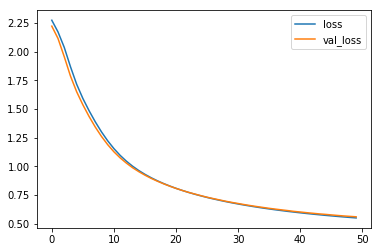

In [234]:
#generate the graph of loss vs epoch
loss = training_stats.history['loss']
val_loss = training_stats.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

In [235]:
#test the classifier and generate accruracy
y_pred=classifier.predict(X_test)
y_one_hot=np.zeros_like(y_pred)
y_one_hot[np.arange(len(y_pred)),y_pred.argmax(1)]=1
acc=accuracy_score(y_test, y_one_hot)
print(acc)

0.792


In [0]:
from sklearn.metrics import confusion_matrix
y_test1=y_test.argmax(1)
y_one1=y_one_hot.argmax(1)
ac=confusion_matrix(y_test1, y_one1)
print(ac)

###CNN with Keras

In [0]:
#declare the NN
classifier= Sequential()
#conv layer
classifier.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
classifier.add(Flatten())
#dense layer
classifier.add(Dense(16,activation='sigmoid'))
#output layer
classifier.add(Dense(10,activation='softmax'))
#define the lr
sgd = optimizers.SGD(lr=0.4)
classifier.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
X_trainIM=X_train.reshape((-1,28,28,1))
X_valIM=X_val.reshape((-1,28,28,1))

In [56]:
#train the network
cnnTrainingData = classifier.fit(X_trainIM,y_train, batch_size=32, epochs=50,validation_data=(X_valIM, y_val))

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 190us/step - loss: 1.2590 - acc: 0.6670 - val_loss: 0.8371 - val_acc: 0.7598
Epoch 2/50
60000/60000 [==============================] - 12s 199us/step - loss: 0.7163 - acc: 0.7856 - val_loss: 0.6613 - val_acc: 0.7798
Epoch 3/50
60000/60000 [==============================] - 11s 191us/step - loss: 0.6024 - acc: 0.8080 - val_loss: 0.5912 - val_acc: 0.8000
Epoch 4/50
60000/60000 [==============================] - 11s 184us/step - loss: 0.5504 - acc: 0.8250 - val_loss: 0.5501 - val_acc: 0.8080
Epoch 5/50
60000/60000 [==============================] - 11s 184us/step - loss: 0.5192 - acc: 0.8308 - val_loss: 0.5279 - val_acc: 0.8176
Epoch 6/50
60000/60000 [==============================] - 11s 186us/step - loss: 0.4973 - acc: 0.8352 - val_loss: 0.5051 - val_acc: 0.8292
Epoch 7/50
60000/60000 [==============================] - 11s 189us/step - loss: 0.4805 - acc: 0.8407 - val_loss: 0.4

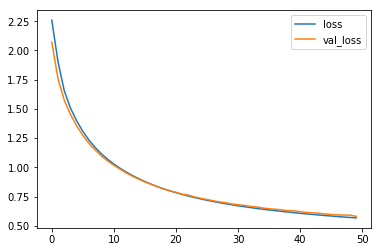

In [50]:
#plot loss vs epoch
loss = cnnTrainingData.history['loss']
val_loss = cnnTrainingData.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

In [54]:
#test the classifier
X_testIM=X_test.reshape((-1,28,28,1))
y_pred=classifier.predict(X_testIM)
y_one_hot=np.zeros_like(y_pred)
y_one_hot[np.arange(len(y_pred)),y_pred.argmax(1)]=1
acc=accuracy_score(y_test, y_one_hot)
print(acc)

0.8094


In [53]:
from sklearn.metrics import confusion_matrix
y_test1=y_test.argmax(1)
y_one1=y_one_hot.argmax(1)
ac=confusion_matrix(y_test1, y_one1)
print(ac)

[[411   2   4  36   5   2  48   0   9   0]
 [  3 450   7  24   1   0   2   0   2   0]
 [  8   0 309   5  93   1  59   0  10   0]
 [ 17   6   3 423  20   0  30   0   1   0]
 [  0   0  53  25 391   1  50   0   3   0]
 [  0   0   0   0   0 420   0  30   2  17]
 [101   1  64  26  65   0 227   0  18   0]
 [  0   0   0   0   0  19   0 459   0  19]
 [  0   1   3   5   2   3   7   1 470   0]
 [  0   0   0   0   0   9   0  29   1 487]]
